In [1]:
# We import everything that we'll use

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

questions = pd.read_csv("2019_questions.csv", parse_dates=["CreationDate"])


In [2]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


In [3]:
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


In [4]:
questions['FavoriteCount'].value_counts()

1.0     953
2.0     205
0.0     175
3.0      43
4.0      12
5.0       8
6.0       4
7.0       4
11.0      1
8.0       1
16.0      1
Name: FavoriteCount, dtype: int64

In [5]:
questions['FavoriteCount'].fillna(0,inplace=True)
questions['FavoriteCount'] = questions['FavoriteCount'].astype(int)
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    8839 non-null int64
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 483.5+ KB


In [6]:
questions['Tags'] = questions['Tags'].apply(lambda x: x.replace('><',',').replace('<','').replace('>','').split(','))
#questions['Tags'] = questions['Tags'].str.replace("^<|>$", "").str.split("><")

In [7]:
questions['Tags']

0                         [machine-learning, data-mining]
1       [machine-learning, regression, linear-regressi...
2            [python, time-series, forecast, forecasting]
3                   [machine-learning, scikit-learn, pca]
4                [dataset, bigdata, data, speech-to-text]
5                                           [fuzzy-logic]
6       [time-series, anomaly-detection, online-learning]
7                                  [matrix-factorisation]
8                   [correlation, naive-bayes-classifier]
9       [machine-learning, python, deep-learning, kera...
10                                     [machine-learning]
11                             [machine-learning, theory]
12                   [machine-learning, gradient-descent]
13      [nlp, clustering, feature-extraction, encoding...
14                  [python, scikit-learn, pandas, numpy]
15      [python, scikit-learn, decision-trees, accurac...
16                                       [python, pandas]
17            

In [8]:
tag_count = {}
for tags in questions['Tags']:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

In [9]:
tag_count = pd.DataFrame.from_dict(tag_count, orient='index')
tag_count.rename(columns={0: "Count"}, inplace=True)

tag_count.head()


,Count
neural-style-transfer,8
objective-function,4
homework,4
convnet,111
h2o,4


In [10]:
most_used = tag_count.sort_values(by='Count',ascending=True).tail(20)
most_used

,Count
machine-learning-model,224
statistics,234
clustering,257
predictive-modeling,265
r,268
dataset,340
regression,347
pandas,354
lstm,402
time-series,466


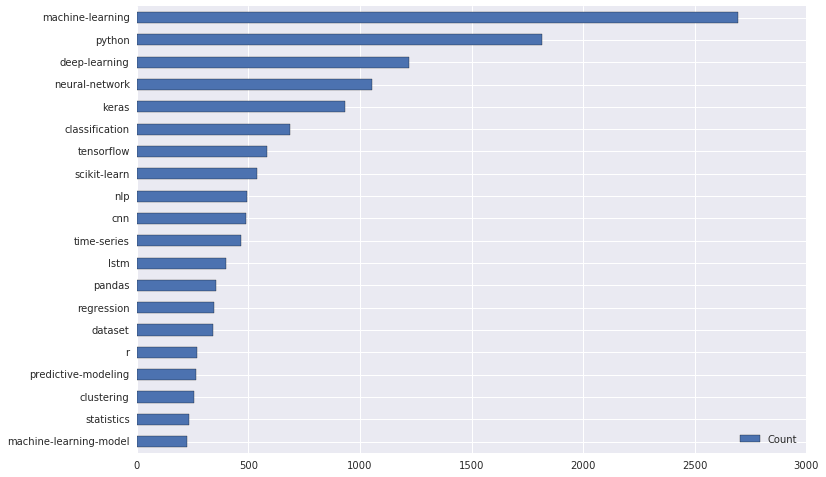

In [11]:
most_used.plot.barh(figsize=(12,8))
plt.show()

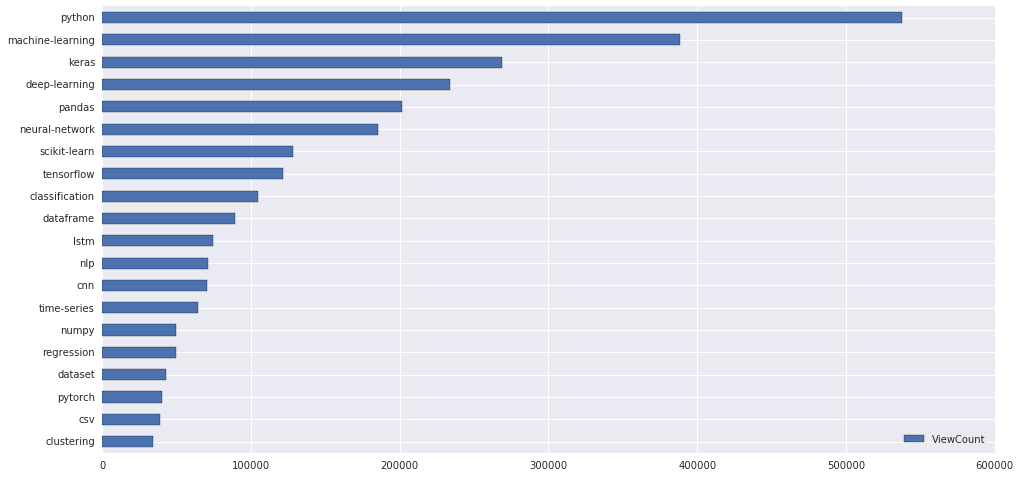

In [12]:
tag_view_count = dict()

for index, row in questions.iterrows():
    for tag in row['Tags']:
        if tag in tag_view_count:
            tag_view_count[tag] += row['ViewCount']
        else:
            tag_view_count[tag] = row['ViewCount']
            
tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient="index")
tag_view_count.rename(columns={0: "ViewCount"}, inplace=True)

most_viewed = tag_view_count.sort_values(by="ViewCount").tail(20)

most_viewed.plot(kind="barh", figsize=(16,8))

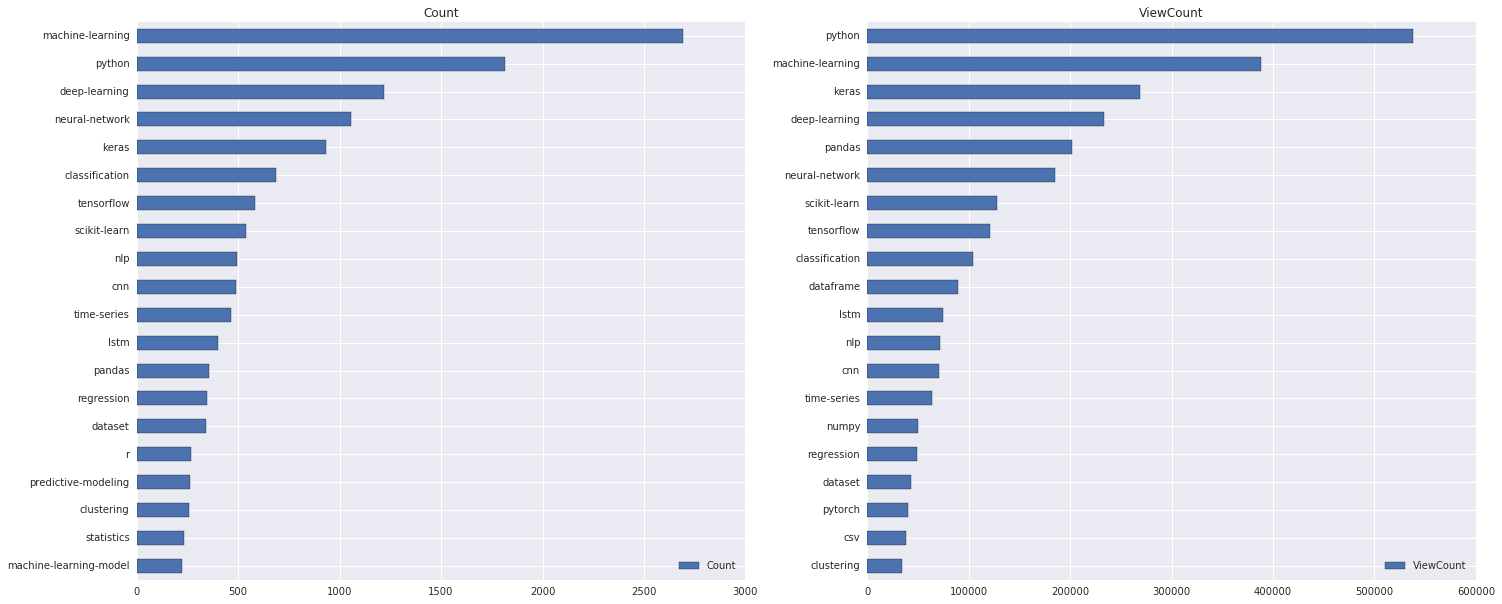

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((24, 10))
most_used.plot(kind="barh", ax=axes[0], subplots=True)
most_viewed.plot(kind="barh", ax=axes[1], subplots=True)
plt.show()

In [14]:
in_used = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)
in_used.fillna(0,inplace=True)
in_used

,Count,ViewCount
machine-learning-model,224,0.0
statistics,234,0.0
clustering,257,33928.0
predictive-modeling,265,0.0
r,268,0.0
dataset,340,43151.0
regression,347,49451.0
pandas,354,201787.0
lstm,402,74458.0
time-series,466,64134.0


In [15]:
in_viewed = pd.merge(most_used, most_viewed, how="right", left_index=True, right_index=True)
in_viewed.fillna(0,inplace=True)
in_viewed

,Count,ViewCount
clustering,257.0,33928
csv,0.0,38654
pytorch,0.0,40240
dataset,340.0,43151
regression,347.0,49451
numpy,0.0,49767
time-series,466.0,64134
cnn,489.0,70349
nlp,493.0,71382
lstm,402.0,74458


# Relations Between Tags


In [16]:
all_tags = list(tag_count.index)
associations = pd.DataFrame(index=all_tags, columns=all_tags)
associations.iloc[0:4,0:4]

,neural-style-transfer,objective-function,homework,convnet
neural-style-transfer,NaN,NaN,NaN,NaN
objective-function,NaN,NaN,NaN,NaN
homework,NaN,NaN,NaN,NaN
convnet,NaN,NaN,NaN,NaN


In [17]:
associations.fillna(0, inplace=True)

for tags in questions["Tags"]:
    associations.loc[tags, tags] += 1

In [19]:
associations.head(10)

,neural-style-transfer,objective-function,homework,convnet,h2o,bert,model-selection,preprocessing,text-mining,openai-gym,...,gensim,keras,text-filter,pathfinder,tokenization,data,orange3,definitions,gridsearchcv,learning-to-rank
neural-style-transfer,8,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
objective-function,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
homework,0,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
convnet,0,0,0,111,0,0,0,0,0,0,...,0,34,0,0,0,0,0,0,2,0
h2o,0,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
bert,1,0,0,0,0,64,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
model-selection,0,0,0,0,0,0,58,2,1,0,...,0,3,0,0,0,0,0,0,1,0
preprocessing,0,0,0,0,0,1,2,120,1,0,...,0,9,0,0,0,9,0,0,0,0
text-mining,0,0,0,0,0,0,1,1,113,0,...,3,0,1,0,0,1,0,0,0,0
openai-gym,0,0,0,0,0,0,0,0,0,17,...,0,1,0,0,0,0,0,0,0,0


In [21]:
relations_most_used = associations.loc[most_used.index, most_used.index]

for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = pd.np.NaN

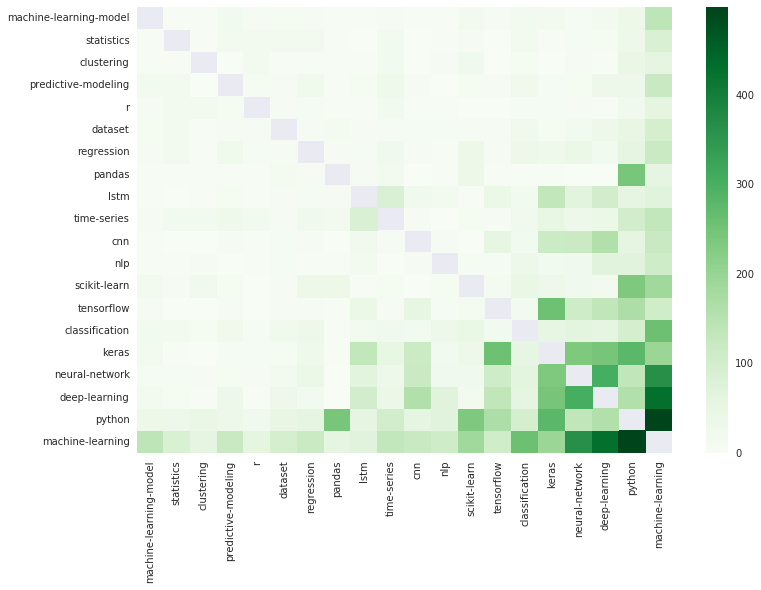

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(relations_most_used, cmap="Greens", annot=False)
plt.show()

# Just a Fad?


In [27]:
all_q = pd.read_csv("all_questions.csv", parse_dates=["CreationDate"])
all_q["Tags"] = all_q["Tags"].str.replace("^<|>$", "").str.split("><")


In [28]:
def class_deep_learning(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow",
                   "keras", "neural-network", "deep-learning"]:
            return 1
    return 0

In [29]:
all_q["DeepLearning"] = all_q["Tags"].apply(class_deep_learning)


In [31]:
all_q.sample(5)


,Id,CreationDate,Tags,DeepLearning
1270,45960,2019-02-21 14:38:33,"[computer-vision, 3d-reconstruction]",0
12895,30510,2018-04-19 07:48:18,"[time-series, forecast]",0
8310,28173,2018-02-22 10:09:44,"[machine-learning, scikit-learn]",1
19628,65119,2019-12-19 10:48:57,"[cnn, text-mining]",1
2577,38118,2018-09-11 20:49:50,"[deep-learning, convnet, cnn, convolution]",1


In [33]:
all_q = all_q[all_q["CreationDate"].dt.year < 2020]


def fetch_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month-1) // 3) + 1)
    return "{y}Q{q}".format(y=year, q=quarter)

all_q["Quarter"] = all_q["CreationDate"].apply(fetch_quarter)

In [34]:
quarterly = all_q.groupby('Quarter').agg({"DeepLearning": ['sum', 'size']})
quarterly.columns = ['DeepLearningQuestions', 'TotalQuestions']
quarterly["DeepLearningRate"] = quarterly["DeepLearningQuestions"]\
                                /quarterly["TotalQuestions"]
# The following is done to help with visualizations later.
quarterly.reset_index(inplace=True)
quarterly.sample(5)

,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
16,18Q2,566,1448,0.390884
13,17Q3,247,714,0.345938
9,16Q3,161,585,0.275214
17,18Q3,685,1512,0.453042
8,16Q2,109,518,0.210425


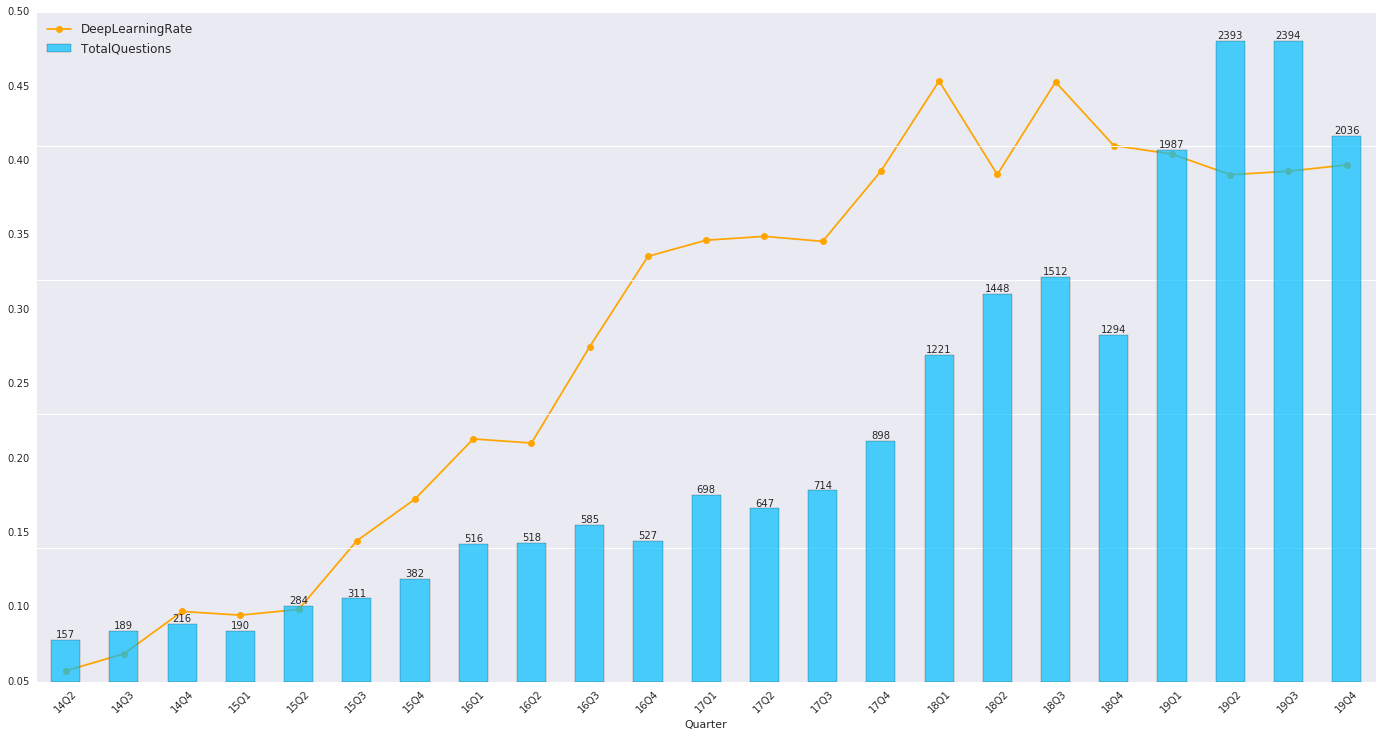

In [38]:
ax1 = quarterly.plot(x="Quarter", y="DeepLearningRate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(24,12)
                    )

ax2 = quarterly.plot(x="Quarter", y="TotalQuestions",
                     kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45, color='#00BFFF')

for idx, t in quarterly["TotalQuestions"].iteritems():
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})


for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)